# Example of the Basic HMM Approach

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../hidden_regime')
import hidden_regime as hr
from hidden_regime import HiddenMarkovModel, HMMConfig

In [5]:
TICKER = 'SPY'

In [6]:
data = hr.load_stock_data(TICKER, '2023-01-01', '2025-09-02')

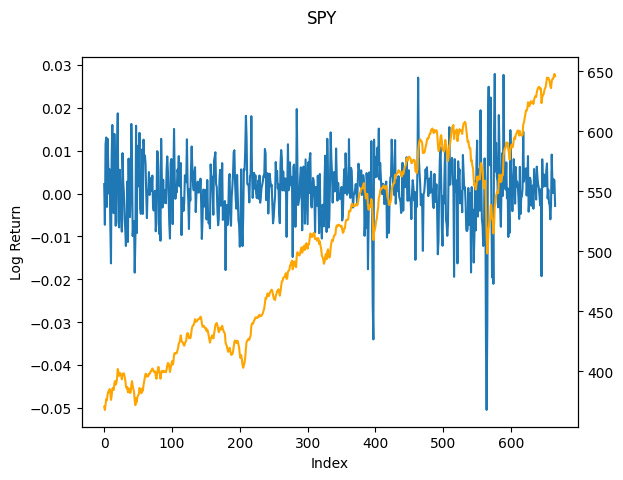

In [7]:
fig = plt.figure()
ax = data.log_return.plot()
ax.set_ylabel('Log Return')
ax.set_xlabel('Index')
ax2 = ax.twinx()
_ = data.price.plot(ax=ax2, color='orange')
_ = fig.suptitle(TICKER)

In [8]:
config = HMMConfig(
    n_states=3, # Simple 3 state approach
    max_iterations=100,
    tolerance=1e-6,
    initialization_method='kmeans',
    random_seed=42
)

In [9]:
hmm = HiddenMarkovModel(config=config)

In [10]:
hmm.fit(data.log_return, verbose=True)

Training 3-state HMM on 666 observations
Max iterations: 100, Tolerance: 1e-06
Iteration 0: Log-likelihood = 2354.9643, Improvement = inf
Iteration 10: Log-likelihood = 2377.9180, Improvement = 0.381834
Iteration 20: Log-likelihood = 2381.0827, Improvement = 0.266709
Iteration 30: Log-likelihood = 2383.1129, Improvement = 0.151263
Iteration 40: Log-likelihood = 2384.1390, Improvement = 0.068247
Iteration 50: Log-likelihood = 2384.5673, Improvement = 0.026409
Iteration 60: Log-likelihood = 2384.7007, Improvement = 0.005102
Iteration 70: Log-likelihood = 2384.7000, Improvement = -0.002583
Iteration 80: Log-likelihood = 2384.7931, Improvement = 0.040735
Iteration 90: Log-likelihood = 2385.2514, Improvement = 0.017380
Training completed in 32.26s
Final log-likelihood: 2385.4607


/mnt/c/Workspace/hidden-regime/hidden_regime/models/base_hmm.py:208: UserWarning: HMM did not converge after 100 iterations. Final improvement: 0.033818
  warnings.warn(


HiddenMarkovModel(n_states=3, fitted=True, log_likelihood=2385.46)

In [11]:
hmm.initial_probs_

array([9.99985480e-01, 1.34239675e-05, 1.09637807e-06])

In [12]:
for i in range(3):
    mean, std = hmm.emission_params_[i]
    print(f"     State {i}: mean={mean:.4f}, std={std:.4f}")

     State 0: mean=0.0028, std=0.0088
     State 1: mean=-0.0099, std=0.0119
     State 2: mean=0.0012, std=0.0049


In [13]:
hmm.transition_matrix_

array([[8.70205856e-01, 5.99084009e-02, 6.98857434e-02],
       [4.91655354e-01, 5.08344327e-01, 3.18726983e-07],
       [1.03913501e-08, 2.92245467e-02, 9.70775443e-01]])

In [14]:
predicted_states = hmm.predict(data.log_return)
state_probabilities = hmm.predict_proba(data.log_return)

In [15]:
price = data.set_index(data.date).price

In [16]:
predicted_state = pd.Series(
    index=data.date, 
    data=predicted_states, 
    name=f'{TICKER}_Predicted_States')

state_probability = pd.DataFrame(
    index=data.date, 
    data=state_probabilities)

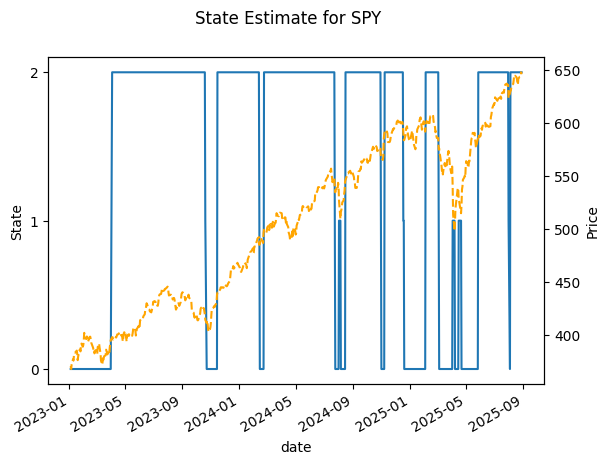

In [17]:
fig = plt.figure()
ax = predicted_state.plot.line()
plt.yticks(list(range(3)))
ax.set_ylabel('State')
ax2 = ax.twinx()
_ = price.plot(ax=ax2, color='orange', style='--')
ax2.set_ylabel('Price')
_ = fig.suptitle(f'State Estimate for {TICKER}')

<Figure size 640x480 with 0 Axes>

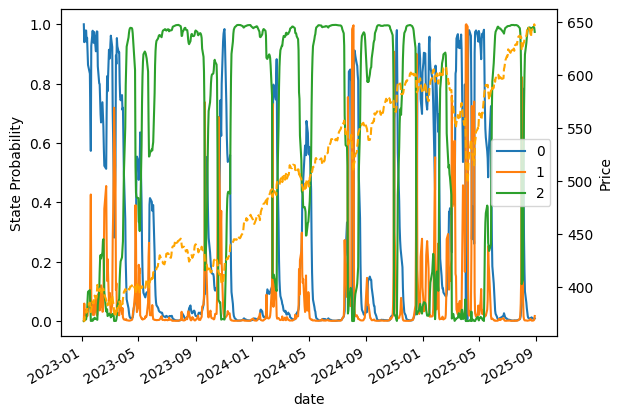

In [18]:
fig = plt.figure()
ax = state_probability.plot.line()
ax.set_ylabel('State Probability')
ax2 = ax.twinx()
_ = price.plot(ax=ax2, color='orange', style='--')
ax2.set_ylabel('Price')
_ = fig.suptitle(f'State Probability Estimate for {TICKER}')